# Initialization

## Packages Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Loading (Q1)

In [ ]:
import os

Dataset_File = "HealthCheck.csv"
if not os.path.isfile(Dataset_File):
  os.system("wget https://raw.githubusercontent.com/cnchi/datasets/master/" + Dataset_File)

In [ ]:
df = pd.read_csv("HealthCheck.csv")

# EDA

In [ ]:
df

,Race,Height_cm,Weight_kg,Over70yr
0,White,186.0,90.0,Yes
1,African,185.0,98.0,No
2,Asian,175.0,80.0,No
3,African,170.0,75.0,Yes
4,Asian,164.0,NaN,No
5,Asian,170.0,72.0,Yes
6,White,178.0,75.0,No
7,White,NaN,89.0,Yes
8,African,165.0,79.0,Yes


In [ ]:
# missing value
df.isnull().sum()

Race         0
Height_cm    1
Weight_kg    1
Over70yr     0
dtype: int64

In [ ]:
df.describe(include="all")

,Race,Height_cm,Weight_kg,Over70yr
count,9,8.000000,8.000000,9
unique,3,NaN,NaN,2
top,White,NaN,NaN,Yes
freq,3,NaN,NaN,5
mean,NaN,174.125000,82.250000,NaN
std,NaN,8.408117,9.098666,NaN
min,NaN,164.000000,72.000000,NaN
25%,NaN,168.750000,75.000000,NaN
50%,NaN,172.500000,79.500000,NaN
75%,NaN,179.750000,89.250000,NaN


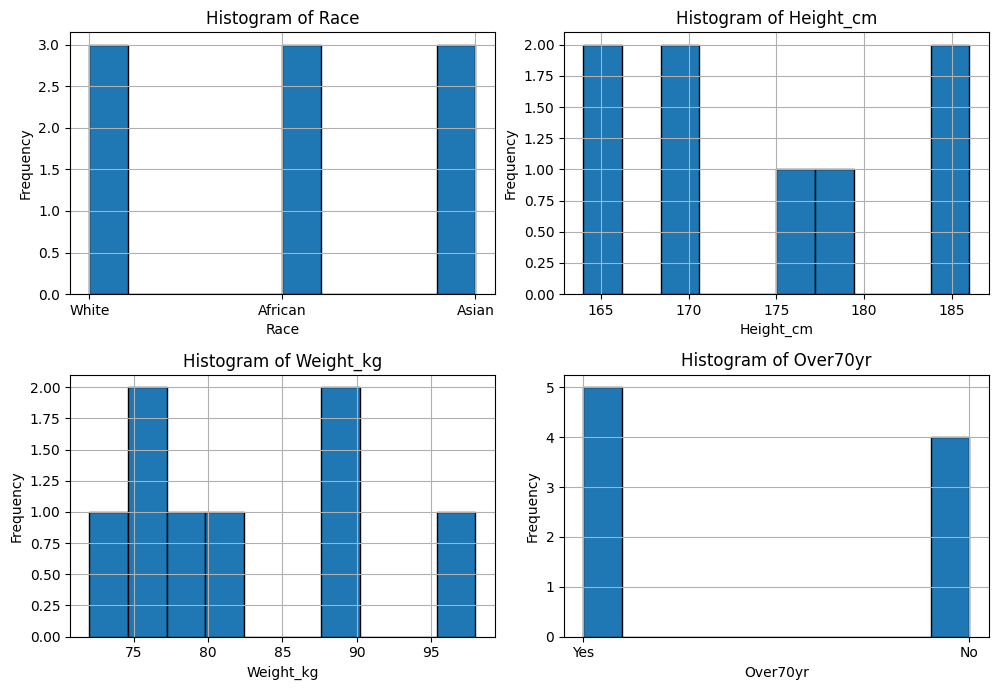

In [ ]:
# frequency
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

for i, column in enumerate(df.columns):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index

    ax = axes[row, col]  # Get the subplot for this column

    ax.hist(df[column], bins=10, edgecolor='black', align='mid')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

    ax.grid()

# Adjust subplot spacing for a better layout
plt.tight_layout()

# Display the figure
plt.show()

<ipython-input-46-a3d00671f9c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


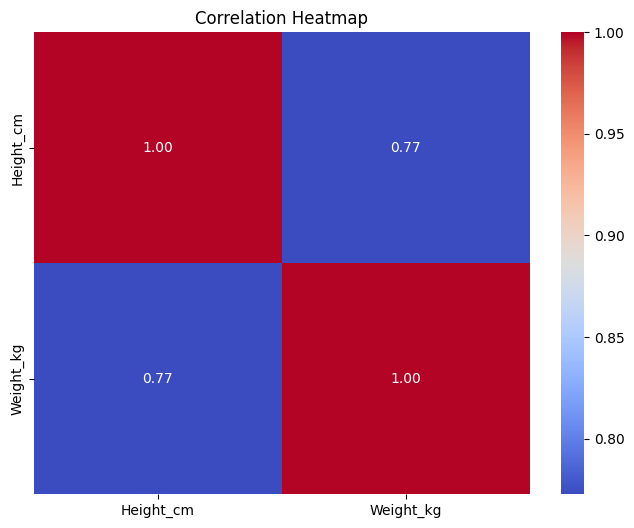

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing

## Splitting Independent and Dependent Variables (Q2)

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1:].values

In [ ]:
X, Y

(array([['White', 186.0, 90.0],
        ['African', 185.0, 98.0],
        ['Asian', 175.0, 80.0],
        ['African', 170.0, 75.0],
        ['Asian', 164.0, nan],
        ['Asian', 170.0, 72.0],
        ['White', 178.0, 75.0],
        ['White', nan, 89.0],
        ['African', 165.0, 79.0]], dtype=object),
 array([['Yes'],
        ['No'],
        ['No'],
        ['Yes'],
        ['No'],
        ['Yes'],
        ['No'],
        ['Yes'],
        ['Yes']], dtype=object))

## Handling Missing Value (Q3)

In [ ]:
df.isnull().sum()

Race         0
Height_cm    1
Weight_kg    1
Over70yr     0
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
X

array([['White', 186.0, 90.0],
       ['African', 185.0, 98.0],
       ['Asian', 175.0, 80.0],
       ['African', 170.0, 75.0],
       ['Asian', 164.0, 82.25],
       ['Asian', 170.0, 72.0],
       ['White', 178.0, 75.0],
       ['White', 174.125, 89.0],
       ['African', 165.0, 79.0]], dtype=object)

## Categorical Data to Digital Data (Q4)

### Label Encoder for variables that don't involve in calculation

In [ ]:
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Y).astype("float64")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y

array([1., 0., 0., 1., 0., 1., 0., 1., 1.])

### One-Hot Encoder for variables that will involve in calculation

In [ ]:
array_dummies = pd.get_dummies(X[:, 0]).values # => get one-hot encode
X = np.concatenate((array_dummies, X[:, 1:4]), axis=1).astype("float64")

In [ ]:
array_dummies

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

In [ ]:
X

array([[  0.   ,   0.   ,   1.   , 186.   ,  90.   ],
       [  1.   ,   0.   ,   0.   , 185.   ,  98.   ],
       [  0.   ,   1.   ,   0.   , 175.   ,  80.   ],
       [  1.   ,   0.   ,   0.   , 170.   ,  75.   ],
       [  0.   ,   1.   ,   0.   , 164.   ,  82.25 ],
       [  0.   ,   1.   ,   0.   , 170.   ,  72.   ],
       [  0.   ,   0.   ,   1.   , 178.   ,  75.   ],
       [  0.   ,   0.   ,   1.   , 174.125,  89.   ],
       [  1.   ,   0.   ,   0.   , 165.   ,  79.   ]])

## Splitting Training and Testing Datasets (Q5)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Feature Scaling (Q6)

In [ ]:
sc_X = StandardScaler().fit(X_train) # standard normalization
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

# Show Results (Q7)

In [ ]:
print(f"""
自變數訓練集：
{X_train}
應變數訓練集：
{Y_train}
自變數測試集：
{X_test}
應變數測試集：
{Y_test}
""")


自變數訓練集：
[[ 1.15470054 -0.63245553 -0.63245553  1.30941777  1.89111602]
 [-0.8660254   1.58113883 -0.63245553 -1.19037979  0.07416141]
 [ 1.15470054 -0.63245553 -0.63245553 -1.07134181 -0.30076573]
 [-0.8660254  -0.63245553  1.58113883  0.47615192 -0.76221452]
 [ 1.15470054 -0.63245553 -0.63245553 -0.47615192 -0.76221452]
 [-0.8660254  -0.63245553  1.58113883  1.42845575  0.96821844]
 [-0.8660254   1.58113883 -0.63245553 -0.47615192 -1.10830111]]
應變數訓練集：
[0. 0. 1. 0. 1. 1. 1.]
自變數測試集：
[[-0.8660254  -0.63245553  1.58113883  0.01487975  0.85285625]
 [-0.8660254   1.58113883 -0.63245553  0.11903798 -0.18540353]]
應變數測試集：
[1. 0.]

